# Importing libraries for ResNet152V2

In [1]:
import matplotlib.pyplot as plt # importing matplotlib library for data visualization
import numpy as np # importing numpy library for numeric calculations
from skimage.io import imread #importing imread for converting JPEG into a NumPy array
from skimage.transform import resize #resizes an image by a given scaling factor
import os # OS module in Python provides functions for creating and removing a directory (folder)
import tensorflow as tf # it is used for fast numerical computing
from tensorflow import keras # it is used for  for developing and evaluating deep learning models
import seaborn as sns # for confusion matrix
import pickle # this is used for serializing and de-serializing Python object structures
import matplotlib.image as mpimg # used for loading , rescaling, and displaying images

from tensorflow.keras.models import Model ##TensorFlow neural networks by specifying the attributes, functions, and layers we want
from tensorflow.keras.models import Sequential # Used for implementing simple layer-by-layer architectures without multiple inputs, multiple outputs, or layer branches
from tensorflow.keras.callbacks import EarlyStopping #it is used to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation datase
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Generate batches of tensor image data with real-time data augmentation
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Dropout,BatchNormalization,Activation

from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score # values

# Defining data Paths

In [2]:
train_path = r"C:\Users\Rahul Choubey\Documents\Dataset\Forest Fire Dataset\Training" # importing training path
test_path = r"C:\Users\Rahul Choubey\Documents\Dataset\Forest Fire Dataset\Testing" # importing testing path
val_path = r"C:\Users\Rahul Choubey\Documents\Dataset\Forest Fire Dataset\Testing" # importing validation path

fire


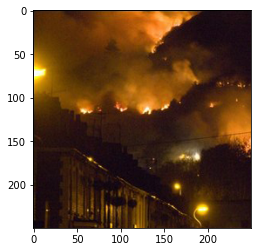

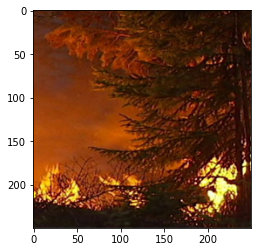

nofire


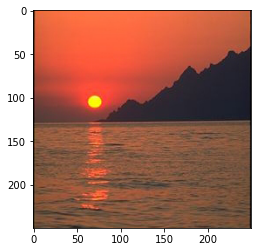

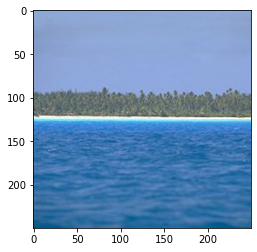

In [3]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        implot = plt.imshow(img)
        plt.show() #shows the image

# Converting image to pixels

In [1]:
#function to convert image to pixels
def imagearray(path,size):
    data = []
    for folder in os.listdir(path):
        sub_path = path+"/"+folder
    
    
        for img in os.listdir(sub_path):
            image_path = sub_path+"/"+img
            img_arr = cv2.imread(image_path)
            img_arr = cv2.resize(img_arr,size)
            data.append(img_arr)
    return data 

In [5]:
#declaring the size
size = (250,250)

In [6]:
train = imagearray(train_path,size)
test = imagearray(test_path,size)
val = imagearray(val_path,size)

# Normalization

In [7]:
#converting images into numpy array
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [8]:
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

# Defining Target Variables

In [9]:
#function to define target variables
def data_class(data_path,size,class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path,
                                         target_size = size,
                                         batch_size = 32,
                                         class_mode = class_mode)
    return classes

In [10]:
#splitting the data
train_class = data_class(train_path,size,"sparse")
test_class = data_class(test_path,size,"sparse")
val_class = data_class(val_path,size,"sparse")

Found 1520 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


In [11]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [12]:
train_class.classes

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
train_class.class_indices

{'fire': 0, 'nofire': 1}

In [14]:
print("y_train_shape",y_train.shape,"y_test_shape",y_test.shape)

y_train_shape (1520,) y_test_shape (380,)


# ResNet152V2 Model

In [15]:
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet152V2(include_top = False,
                                                  input_shape = (250,250,3),
                                                  pooling = "avg", classes = 2,
                                                  weights = "imagenet")
for layer in pretrained_model.layers:
  layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = "relu"))
resnet_model.add(Dense(2,activation = "softmax"))


In [17]:
early_stop = EarlyStopping(mode = "max",verbose = 1, patience = 5)

In [18]:
#compiling the model
resnet_model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [19]:
#fitting the model
history  = resnet_model.fit(x_train,y_train,
                 validation_data = (x_val,y_val),
         epochs = 10
          ,callbacks = [early_stop],
         batch_size = 30,
         shuffle = True,
        steps_per_epoch = 20)

Epoch 1/10
20/20 [==============================] - 127s 6s/step - loss: 0.1699 - accuracy: 0.9383 - val_loss: 0.1139 - val_accuracy: 0.9579
Epoch 2/10
20/20 [==============================] - 110s 6s/step - loss: 0.0890 - accuracy: 0.9683 - val_loss: 0.0526 - val_accuracy: 0.9842
Epoch 3/10
20/20 [==============================] - 111s 6s/step - loss: 0.0601 - accuracy: 0.9780 - val_loss: 0.0438 - val_accuracy: 0.9763
Epoch 4/10
20/20 [==============================] - 113s 6s/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0456 - val_accuracy: 0.9763
Epoch 5/10
20/20 [==============================] - 110s 6s/step - loss: 0.0094 - accuracy: 0.9983 - val_loss: 0.0382 - val_accuracy: 0.9842
Epoch 6/10
20/20 [==============================] - 108s 6s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 0.9842
Epoch 7/10
20/20 [==============================] - 109s 6s/step - loss: 0.0093 - accuracy: 0.9967 - val_loss: 0.0312 - val_accuracy: 0.9895
Epoch 8/10
20

# Model Evaluation

In [20]:
resnet_model.evaluate(x_train, y_train) # evaluate model showing training accuracy and loss 

48/48 [==============================] - 156s 3s/step - loss: 0.0016 - accuracy: 1.0000


[0.001562748453579843, 1.0]

In [21]:
resnet_model.evaluate(x_test, y_test) # evaluate model showing testing accuracy and loss 

12/12 [==============================] - 39s 3s/step - loss: 0.0272 - accuracy: 0.9868


[0.0271752942353487, 0.9868420958518982]

In [22]:
resnet_model.evaluate(x_val,y_val) # evaluate model showing validation accuracy and loss 

12/12 [==============================] - 39s 3s/step - loss: 0.0272 - accuracy: 0.9868


[0.0271752942353487, 0.9868420958518982]

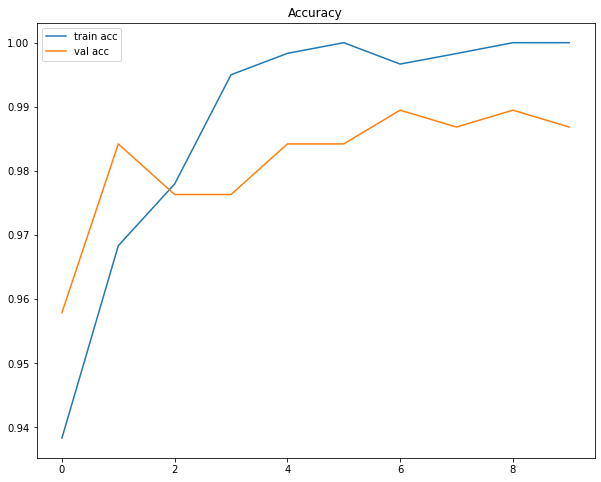

In [23]:
plt.figure(figsize = (10,8))
plt.plot(history.history['accuracy'],label = 'train acc')
plt.plot(history.history['val_accuracy'],label = 'val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

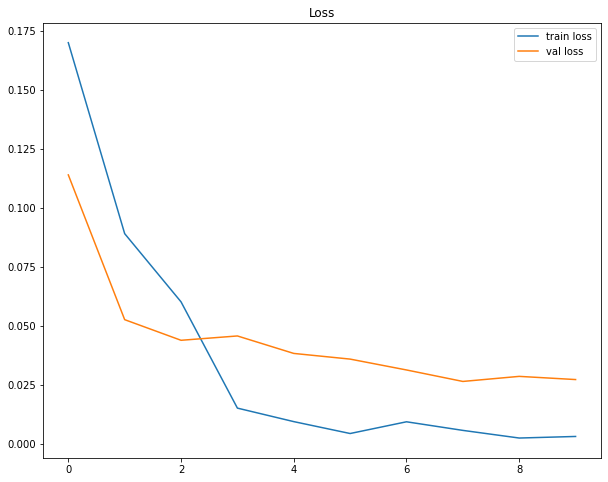

In [24]:
plt.figure(figsize = (10,8))
plt.plot(history.history['loss'],label = 'train loss')
plt.plot(history.history['val_loss'],label = 'val loss')
plt.legend()
plt.title('Loss')
plt.show()

In [25]:
#Making prediction
y_pred=resnet_model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

In [26]:
print(classification_report(y_pred,y_test))

import warnings
warnings.simplefilter("ignore", UserWarning)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       189
           1       0.99      0.98      0.99       191

    accuracy                           0.99       380
   macro avg       0.99      0.99      0.99       380
weighted avg       0.99      0.99      0.99       380



[Text(0, 0.5, 'fire'), Text(0, 1.5, 'nofire')]

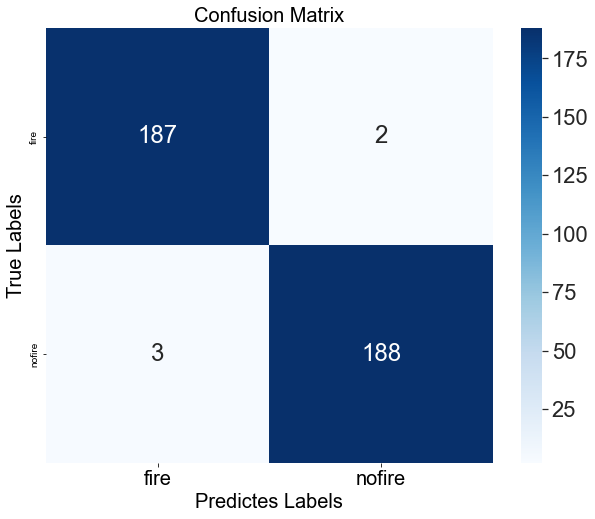

In [27]:
cm = confusion_matrix(y_pred,y_test)

plt.figure(figsize = (10,8))
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm,annot = True,fmt = 'g',cmap = "Blues", ax = ax);

# Labels, title and ticks
ax.set_xlabel("Predictes Labels", fontsize = 20); ax.set_ylabel('True Labels', fontsize = 20);
ax.set_title("Confusion Matrix", fontsize = 20);
ax.xaxis.set_ticklabels(["fire","nofire"], fontsize = 20); ax.yaxis.set_ticklabels(["fire","nofire"])

In [39]:
print("f1_score",f1_score(y_test,y_pred,average = "micro"))
print("recall_score",recall_score(y_test,y_pred,average = "weighted"))
print("precision_score",precision_score(y_test,y_pred,average = "micro"))

f1_score 0.9868421052631579
recall_score 0.9868421052631579
precision_score 0.9868421052631579


In [31]:
y_pred_train=resnet_model.predict(x_train)

In [32]:
y_pred_train=np.argmax(y_pred_train,axis=1)

In [33]:
print(classification_report(y_pred_train,y_train))

import warnings
warnings.simplefilter("ignore", UserWarning)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       760
           1       1.00      1.00      1.00       760

    accuracy                           1.00      1520
   macro avg       1.00      1.00      1.00      1520
weighted avg       1.00      1.00      1.00      1520



[Text(0, 0.5, 'fire'), Text(0, 1.5, 'nofire')]

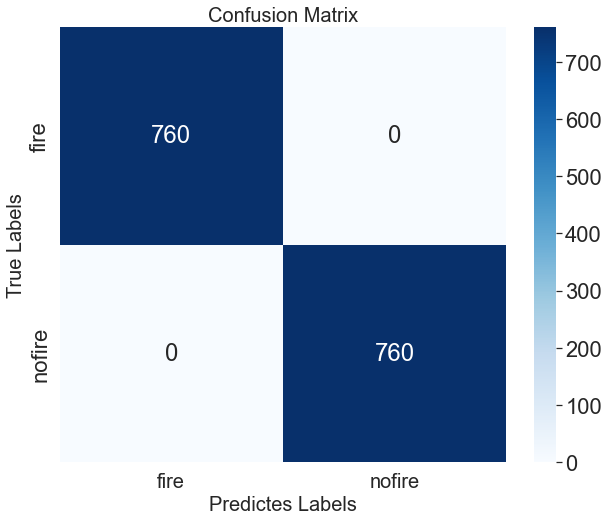

In [34]:
cm = confusion_matrix(y_pred_train,y_train)

plt.figure(figsize = (10,8))
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm,annot = True,fmt = 'g',cmap = "Blues", ax = ax);

# Labels, title and ticks
ax.set_xlabel("Predictes Labels", fontsize = 20); ax.set_ylabel('True Labels', fontsize = 20);
ax.set_title("Confusion Matrix", fontsize = 20);
ax.xaxis.set_ticklabels(["fire","nofire"], fontsize = 20); ax.yaxis.set_ticklabels(["fire","nofire"])

In [38]:
print("f1_score",f1_score(y_train,y_pred_train,average = "micro"))
print("recall_score",recall_score(y_train,y_pred_train,average = "weighted"))
print("precision_score",precision_score(y_train,y_pred_train,average = "weighted"))

f1_score 1.0
recall_score 1.0
precision_score 1.0
